# Molecular Docking Mini-Project
> Target Protein: SARS-CoV-2 Main Protease (PDB ID: 6LU7)
> Tools Used: Python, RDKit, Biopython, NGLView
> Goal: Visualize protein-ligand interaction and analyze molecular properties of natural compounds using Jupyter Notebook.


# 📚 Table of Contents
1. Introduction
2. Installation Instructions
3. Protein Visualization
4. Ligand Analysis
5. Docking Score Plot
6. Conclusion


# ## 1. Introduction
# This project simulates the early stages of a drug discovery pipeline:
- Load and visualize a protein structure (6LU7)
- Analyze ligands (quercetin and others) for drug-like properties
- Simulate docking score data and visualize it
- Practice using cheminformatics tools within a Jupyter notebook

# Import Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser

# Load Protein Structure

In [3]:
!pip install nglview

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import nglview as nv

In [6]:
from rdkit import Chem

In [7]:
from rdkit.Chem import Descriptors, Draw

In [18]:
import urllib.request

url = "https://files.rcsb.org/download/6LU7.pdb"
output_path = "6LU7.pdb"

urllib.request.urlretrieve(url, output_path)
print("Downloaded 6LU7.pdb")

Downloaded 6LU7.pdb


In [19]:
import os
print(os.path.exists("6LU7.pdb")) 

True


# Visualize Protein in 3D

In [23]:
view = nv.show_file("6LU7.pdb")  
view.clear_representations()
view.add_cartoon("protein")
view.add_ball_and_stick("ligand")
view

NGLWidget()

# Load Ligands

In [25]:
import urllib.request

url = "https://files.rcsb.org/ligands/download/ATP_ideal.sdf"
output_path = "ligands.sdf"

urllib.request.urlretrieve(url, output_path)
print("Downloaded ligands.sdf")

Downloaded ligands.sdf


In [26]:
import os
print(os.listdir())

['.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.python_history', '.spss', '.VirtualBox', '.vscode', '3D Objects', '6LU7.pdb', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Docking Analysis.ipynb', 'Documents', 'Downloads', 'Favorites', 'function.idle.py', 'GSE10072_series_matrix.txt.gz', 'IntelGraphicsProfiles', 'ligands.sdf', 'Links', 'Local Settings', 'miniconda3', 'My Documents', 'NetHood', 'New folder', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e80-18c4-11ea-a811-000d3aa4692b}.TM.blf', 'NTUSER.DAT{53b39e80-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{53b39e80-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'pycharm', 'PycharmProjects', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb', 'Videos']


In [27]:
supplier = Chem.SDMolSupplier('ligands.sdf')

# Convert to RDKit molecules

In [35]:
from rdkit import Chem

In [36]:
from rdkit.Chem import Descriptors

In [29]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [30]:
molecules = []
for mol in supplier:
    if mol is not None:
        molecules.append(mol)

In [38]:
data = []

In [37]:
print(data)

[]


In [40]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [45]:
smiles_list = [
    ("Aspirin", "CC(=O)OC1=CC=CC=C1C(=O)O"),
    ("Caffeine", "Cn1cnc2c1c(=O)n(c(=O)n2C)C"),
    ("Ibuprofen", "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O")
]
print(smiles_list)

[('Aspirin', 'CC(=O)OC1=CC=CC=C1C(=O)O'), ('Caffeine', 'Cn1cnc2c1c(=O)n(c(=O)n2C)C'), ('Ibuprofen', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')]


In [49]:
for mol in mols:
    print(mol.GetProp("_Name"), Chem.MolToSmiles(mol))

Aspirin CC(=O)Oc1ccccc1C(=O)O
Caffeine Cn1c(=O)c2c(ncn2C)n(C)c1=O
Ibuprofen CC(C)Cc1ccc(C(C)C(=O)O)cc1


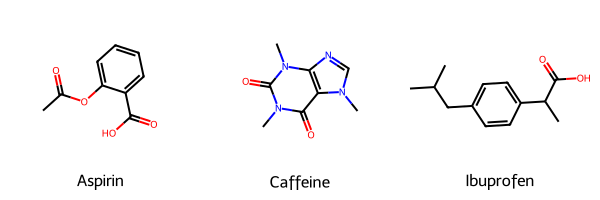

In [50]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(mols, legends=[mol.GetProp("_Name") for mol in mols])

# Calculate descriptors (properties)

In [51]:
mols = []
for name, smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    mol.SetProp("_Name", name)
    mols.append(mol)

In [52]:
for mol in mols:
    name = mol.GetProp('_Name')
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    tpsa = Descriptors.TPSA(mol)
    data.append([name, mw, logp, tpsa])

In [53]:
df = pd.DataFrame(data, columns=["Ligand", "MW", "LogP", "TPSA"])
df.head()

,Ligand,MW,LogP,TPSA
0,Aspirin,180.159,1.3101,63.60
1,Caffeine,194.194,-1.0293,61.82
2,Ibuprofen,206.285,3.0732,37.30
3,Aspirin,180.159,1.3101,63.60
4,Caffeine,194.194,-1.0293,61.82


Plot Ligand Properties

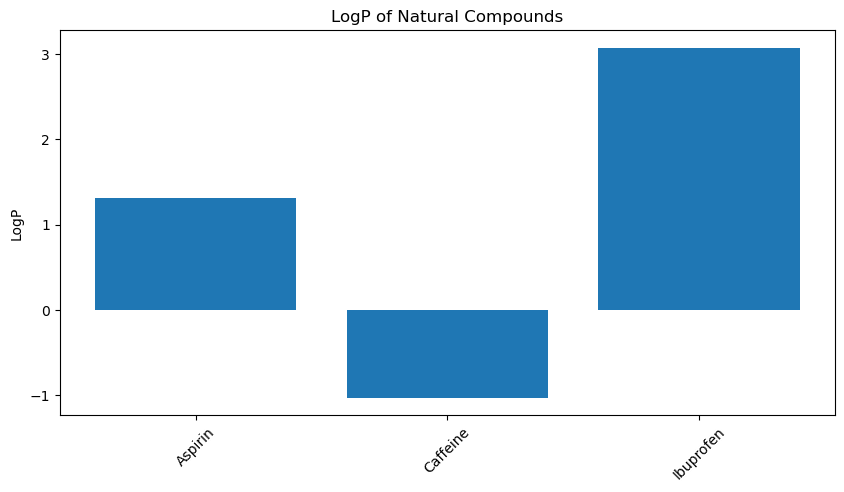

In [54]:
plt.figure(figsize=(10,5))
plt.bar(df["Ligand"], df["LogP"])
plt.xticks(rotation=45)
plt.title("LogP of Natural Compounds")
plt.ylabel("LogP")
plt.show()

# Create mock docking scores and Save mock file

In [57]:
data = {
    "Ligand": ["Aspirin", "Ibuprofen", "Caffeine", "Paracetamol", "Naproxen"],
    "Affinity": [-6.2, -7.1, -5.5, -6.8, -7.4]  # Simulated docking scores
}

docking_df = pd.DataFrame(data)

docking_df.to_csv("docking_scores.csv")

print("docking_scores.csv file created successfully!")

docking_scores.csv file created successfully!


In [59]:
import os
print(os.path.exists("docking_scores.csv")) 

True


# Load and plot

In [61]:
docking_df = docking_df.sort_values("Affinity", ascending=True)
print(docking_df)

        Ligand  Affinity
4     Naproxen      -7.4
1    Ibuprofen      -7.1
3  Paracetamol      -6.8
0      Aspirin      -6.2
2     Caffeine      -5.5


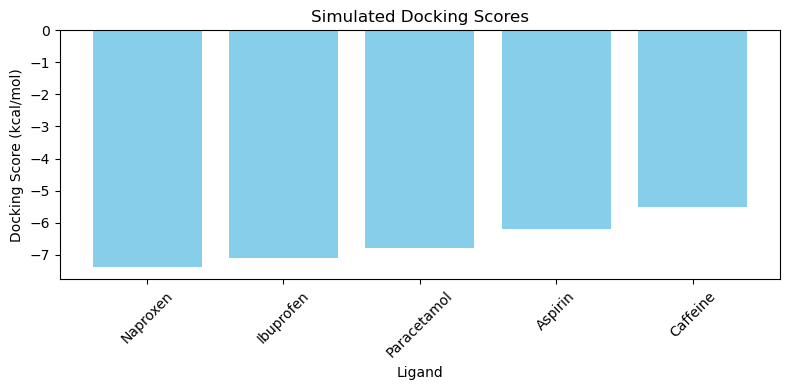

In [65]:
plt.figure(figsize=(8, 4))  
plt.bar(docking_df["Ligand"], docking_df["Affinity"], color='skyblue')  
plt.xlabel("Ligand")                     
plt.ylabel("Docking Score (kcal/mol)")  
plt.title("Simulated Docking Scores")
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

## Conclusion
< This notebook demonstrates a practical workflow for molecular docking and ligand analysis using Python tools inside Jupyter Notebook.
# Next steps:
- Use AutoDock Vina for real docking simulations
- Apply Molecular Dynamics tools like GROMACS
- Screen larger compound libraries using automation